In [51]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

In [31]:
msleep = pd.read_csv('msleep.csv').dropna()
msleep

,name,genus,vore,order,conservation,sleep_total,sleep_rem,sleep_cycle,awake,brainwt,bodywt
3,Greater short-tailed shrew,Blarina,omni,Soricomorpha,lc,14.9,2.3,0.133333,9.1,0.00029,0.019
4,Cow,Bos,herbi,Artiodactyla,domesticated,4.0,0.7,0.666667,20.0,0.42300,600.000
8,Dog,Canis,carni,Carnivora,domesticated,10.1,2.9,0.333333,13.9,0.07000,14.000
11,Guinea pig,Cavis,herbi,Rodentia,domesticated,9.4,0.8,0.216667,14.6,0.00550,0.728
13,Chinchilla,Chinchilla,herbi,Rodentia,domesticated,12.5,1.5,0.116667,11.5,0.00640,0.420
16,Lesser short-tailed shrew,Cryptotis,omni,Soricomorpha,lc,9.1,1.4,0.150000,14.9,0.00014,0.005
17,Long-nosed armadillo,Dasypus,carni,Cingulata,lc,17.4,3.1,0.383333,6.6,0.01080,3.500
19,North American Opossum,Didelphis,omni,Didelphimorphia,lc,18.0,4.9,0.333333,6.0,0.00630,1.700
21,Big brown bat,Eptesicus,insecti,Chiroptera,lc,19.7,3.9,0.116667,4.3,0.00030,0.023
22,Horse,Equus,herbi,Perissodactyla,domesticated,2.9,0.6,1.000000,21.1,0.65500,521.000


In [30]:

X = pd.DataFrame([msleep['sleep_total'], msleep['sleep_cycle']]).T
X

,sleep_total,sleep_cycle
3,14.9,0.133333
4,4.0,0.666667
8,10.1,0.333333
11,9.4,0.216667
13,12.5,0.116667
16,9.1,0.150000
17,17.4,0.383333
19,18.0,0.333333
21,19.7,0.116667
22,2.9,1.000000


In [27]:
classifier = KMeans(4, random_state=0)
classifier.fit(X)


KMeans(n_clusters=4, random_state=0)

In [29]:
centroids = classifier.cluster_centers_
centroids

array([[13.35714286,  0.20714286],
       [ 3.76666667,  0.85555556],
       [ 9.22857143,  0.2952381 ],
       [18.36666667,  0.27777778]])

[]

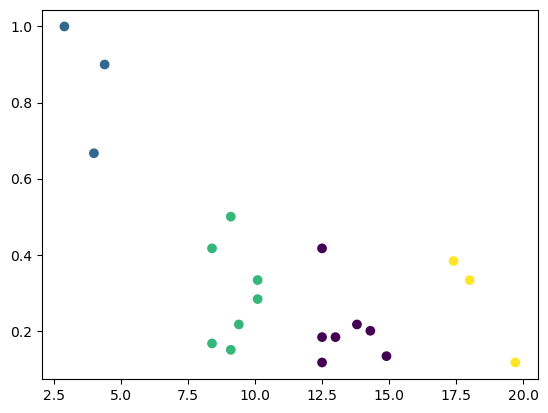

In [67]:
y_pred = classifier.predict(X)
plt.scatter(X['sleep_total'], X['sleep_cycle'], c=y_pred)
plt.plot()

In [50]:
lax_df = pd.read_csv('LAX_2005.csv')
lax_df

,Month,Cancelled,Delayed,Diverted,On Time
0,1,443,5021,31,13870
1,2,180,4264,15,12951
2,3,188,3385,18,15916
3,4,146,2637,8,15926
4,5,154,2821,14,16722
5,6,185,4057,14,15283
6,7,218,3910,8,16038
7,8,202,3589,15,16484
8,9,215,3167,12,15635
9,10,238,2961,12,16199


In [53]:
avg_delay = np.mean(lax_df['Delayed'])
avg_cancel = np.mean(lax_df['Cancelled'])

[]

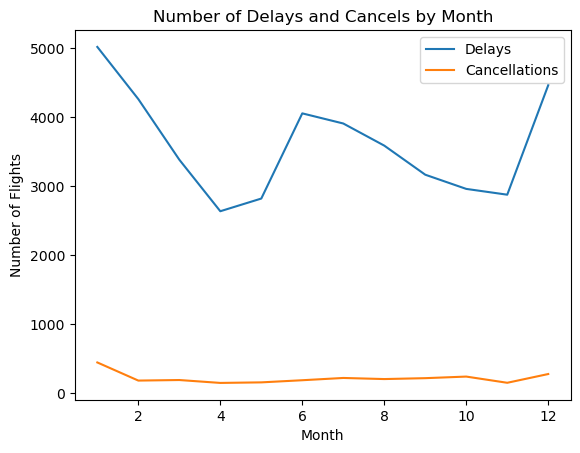

In [85]:

lax_df['Delayed']
# plt.plot(ydata=[lax_df['Delayed'], lax_df['Cancelled']], xdata=lax_df['Month'])
plt.plot(lax_df['Month'], lax_df['Delayed'])
plt.plot(lax_df['Month'], lax_df['Cancelled'])
plt.xlabel('Month', fontsize=10)
plt.ylabel('Number of Flights',fontsize=10)
plt.title('Number of Delays and Cancels by Month')
plt.legend(['Delays', 'Cancellations'])
plt.plot()